In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
WTP = "$WTP_{i,w}$"

In [75]:
evolution_log = pd.read_csv("evolution_log.csv")
event_history = pd.read_csv("event_history.csv").sort_values(by="event")
price_matrix = pd.read_csv("price_matrix.csv")
pso_log = pd.read_csv("pso_log.csv")
random_search_log = pd.read_csv("random_search_log.csv")


num_customers = event_history.customer.max() + 1

In [92]:
fitness_dist_es = evolution_log.drop_duplicates(subset=["individual"])

## Random Search

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(data=random_search_log.fitness, ax=ax, bins=50)
sns.histplot(data=pso_log.current_fitness, ax=ax, bins=50)
sns.histplot(data=fitness_dist_es, ax=ax, bins=50)

ax.grid(axis="y")
ax.set_axisbelow(True)

ax.set_xlabel("Fitness")
ax.set_ylabel("Num Evalutations")
ax.legend(["Random Search", "PSO", "Evolution Strategy"])

In [94]:
fitness_dist_es

,run_id,generation,n_evals,type,individual,score,avg_regret,regret,lambda,mu,p,selection,mutation_probability,mutation_strength,mutation_strat,loss_aversion
0,0,0,2,population,0,0,217.816157,13068.969400,1,1,1,plus,1,5.000000e+01,rechenberg,2.25
1,0,0,2,offspring,1,2292,233.223817,13993.428996,1,1,1,plus,1,5.000000e+01,rechenberg,2.25
3,0,1,3,offspring,2,3139,225.292391,13517.543443,1,1,1,plus,1,5.000000e+01,rechenberg,2.25
5,0,2,4,offspring,3,3733,208.604492,12516.269535,1,1,1,plus,1,5.000000e+01,rechenberg,2.25
7,0,3,5,offspring,4,4933,181.387263,10883.235764,1,1,1,plus,1,5.000000e+01,rechenberg,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,0,995,997,offspring,996,9335,90.407090,5424.425408,1,1,1,plus,1,2.662401e-07,rechenberg,2.25
1993,0,996,998,offspring,997,10436,94.967357,5698.041443,1,1,1,plus,1,2.662401e-07,rechenberg,2.25
1995,0,997,999,offspring,998,10095,88.541489,5312.489317,1,1,1,plus,1,2.662401e-07,rechenberg,2.25
1997,0,998,1000,offspring,999,11479,88.555108,5313.306483,1,1,1,plus,1,2.662401e-07,rechenberg,2.25


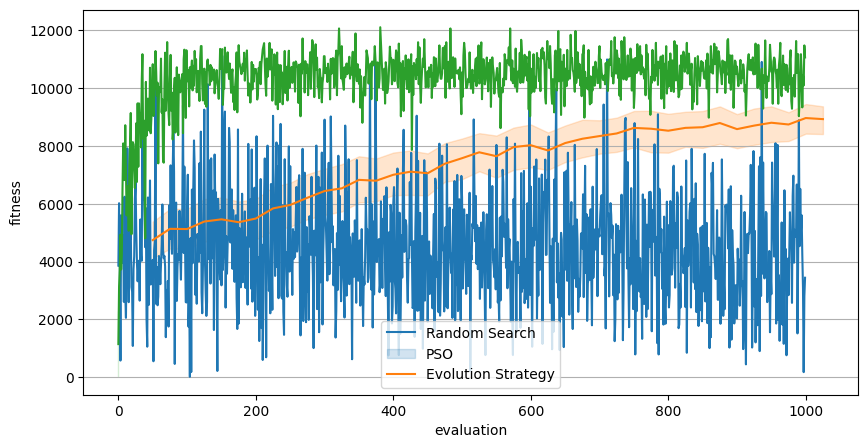

In [97]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(
    data=random_search_log,
    x="evaluation",
    y="fitness",  
    ax=ax
)
sns.lineplot(
    data=pso_log,
    x="num_evals",
    y="current_fitness",  
    ax=ax
)
sns.lineplot(data=fitness_dist_es, 
    x="generation",
    y="score",  
    ax=ax
)
ax.grid(axis="y")
ax.legend(["Random Search", "PSO", "Evolution Strategy"])

## PSO

In [ ]:
event_history.loc[event_history.event == 'quit'].groupby('run_id').agg(
    quit_count=('customer', lambda x: len(x.unique()) / num_customers),
)

In [37]:
run_summary = evolution_log.groupby(["run_id", "loss_aversion"]).agg(
    {"score": "max"}
).reset_index()

Text(0.5, 1.0, 'PSO Fitness Evolution')

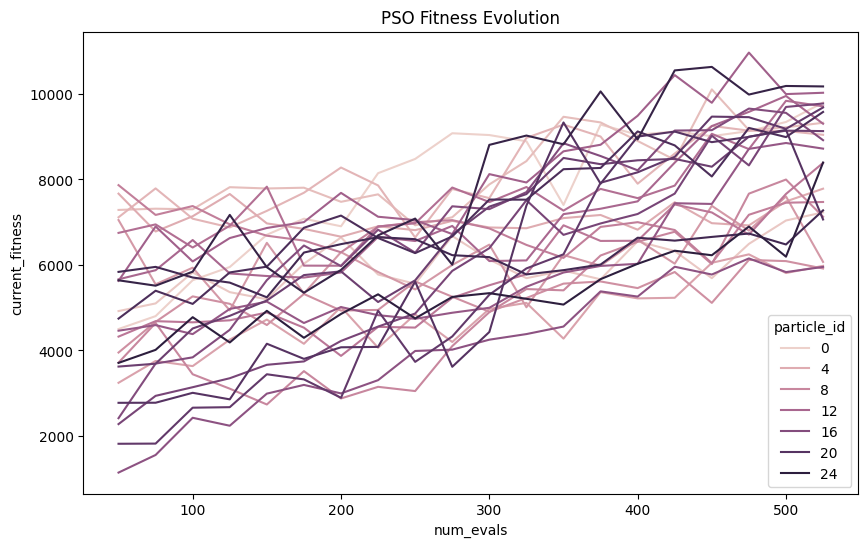

In [72]:
pso_log
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(
    data=pso_log,
    x="num_evals",
    y="current_fitness",
    hue="particle_id",
    ax=ax,
    # palette=sns.color_palette("tab10"),
)
ax.set_title("PSO Fitness Evolution")

## Event History

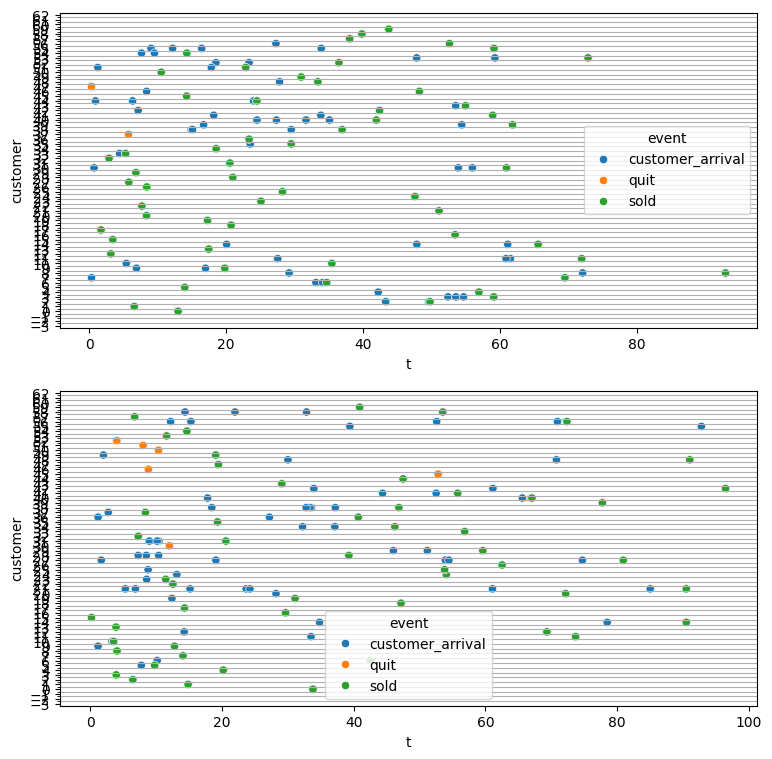

In [36]:
def plot_event_history(ax, data):

    sns.scatterplot(x="t", y="customer", data=data, hue="event", ax=ax)
    ax.grid(axis="y")
    ax.yaxis.set_major_locator(plt.MultipleLocator(1))
    ax.set_ylim(ax.get_ylim()[0] - 0.5, ax.get_ylim()[1] + 0.5)
    ax.yaxis.set_major_locator(plt.MultipleLocator(1))
    ax.yaxis.set_minor_locator(
        plt.MultipleLocator(0.5)
    )
    ax.grid(True, axis="y", which="minor")
    ax.grid(False, axis="y", which="major")


fig, axs = plt.subplots(2,1, figsize=(9, 9))
plot_event_history(axs[0], event_history.loc[event_history.run_id == 0])
plot_event_history(axs[1], event_history.loc[event_history.run_id == 13])


In [30]:
event_history.loc[event_history.run_id == 11]

,run_id,t,event,customer,customer_wtp,customer_max_wtp,group,price,irp,erp,rp,loss_aversion
1970,11,0.415983,customer_arrival,38,122,159,2,0,122,122,122,5.0
1971,11,0.415983,sold,38,122,159,2,136,122,122,122,5.0
1972,11,0.833364,customer_arrival,15,198,270,0,0,198,198,198,5.0
1973,11,0.875676,customer_arrival,37,120,150,2,0,120,120,120,5.0
1974,11,1.318151,customer_arrival,9,202,292,0,0,202,202,202,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2145,11,88.903440,sold,34,119,165,2,136,119,119,119,5.0
2146,11,93.481674,customer_arrival,48,128,166,2,136,129,150,129,5.0
2147,11,93.481674,sold,48,131,166,2,136,132,148,132,5.0
2148,11,96.974820,customer_arrival,14,206,288,0,234,206,206,206,5.0


/home/laurinbrechter/.local/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


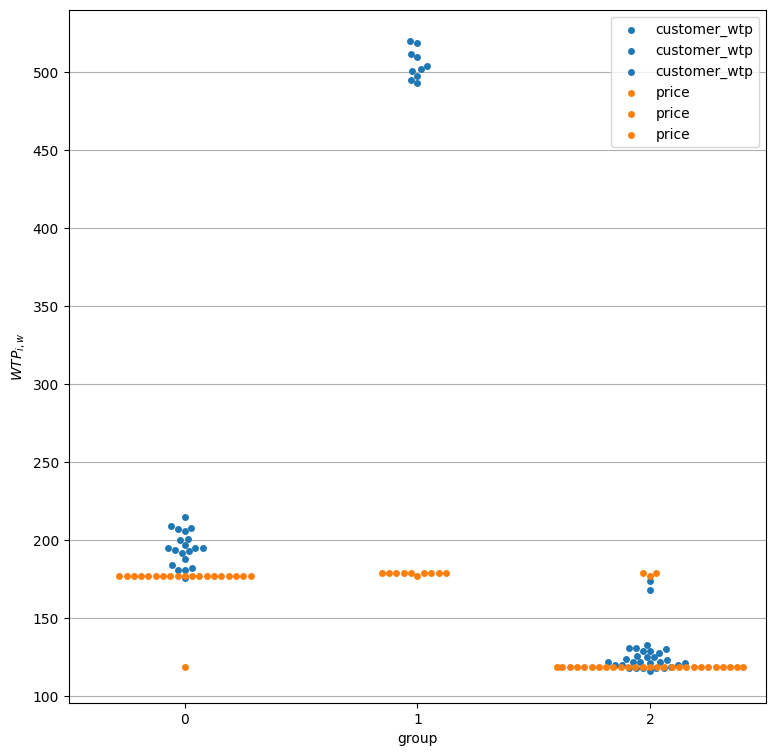

In [8]:
quit_sold = event_history.loc[event_history["event"].isin(["sold", "quit"])]
fig, ax = plt.subplots(figsize=(9, 9))
sns.swarmplot(x="group", y="customer_wtp", data=quit_sold, ax=ax, label="customer_wtp")
sns.swarmplot(x="group", y="price", data=quit_sold, ax=ax, label="price")
ax.grid(axis="y")
ax.set_ylabel(WTP)
plt.show()

In [9]:
quit_sold = event_history.loc[event_history["event"].isin(["sold", "quit"])]

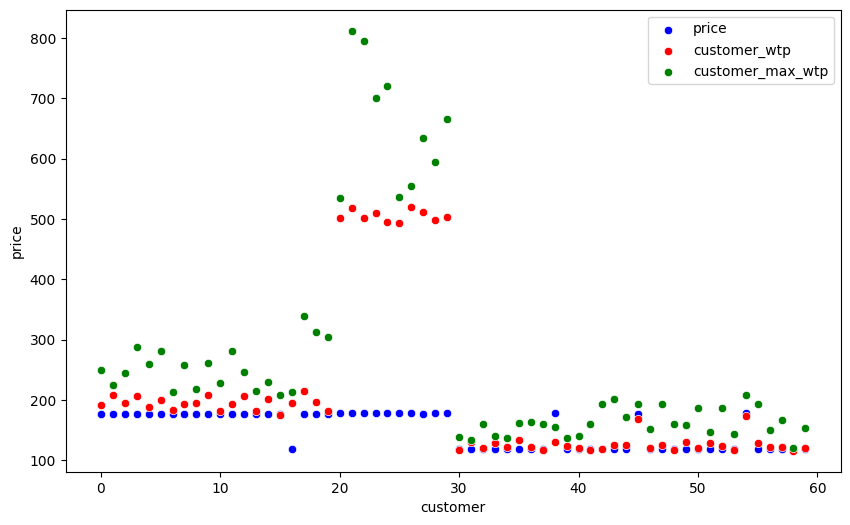

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x="customer", y="price", data=quit_sold, color='blue', label='price', ax=ax)
sns.scatterplot(
    x="customer", y="customer_wtp", data=quit_sold, color='red', label='customer_wtp', ax=ax
)
sns.scatterplot(
    x="customer", y="customer_max_wtp", data=quit_sold, color='green', label='customer_max_wtp', ax=ax
)
plt.legend()

## ES performance population and offspring

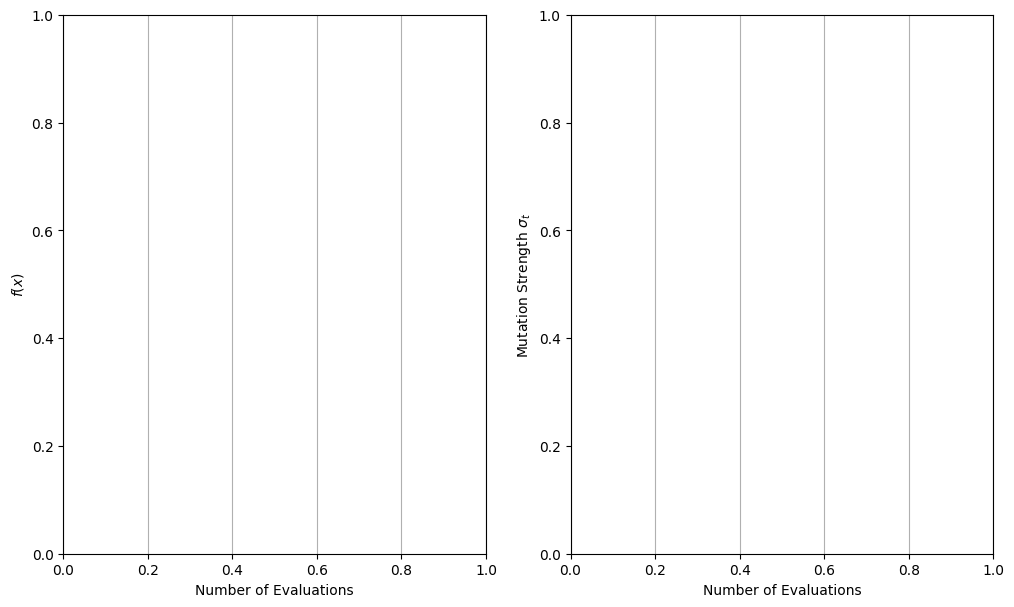

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 7))
sns.scatterplot(
    x="n_evals",
    y="score",
    data=evolution_log.loc[evolution_log["run_id"] == 1],
    hue="type",
    ax=axs[0],
)

sns.lineplot(
    x="n_evals",
    y="mutation_strength",
    data=evolution_log.loc[(evolution_log["type"] == "population") & (evolution_log["run_id"] == 1)],
    ax=axs[1],
)

# ax.legend()
axs[0].set_ylabel("$f(x)$")
axs[0].grid(axis="x")
axs[1].grid(axis="x")
axs[0].set_xlabel("Number of Evaluations")
axs[1].set_xlabel("Number of Evaluations")

axs[1].set_ylabel("Mutation Strength $\sigma_t$")
plt.show()

### rechenberg vs none

Text(0.5, 0, 'Number of Evaluations')

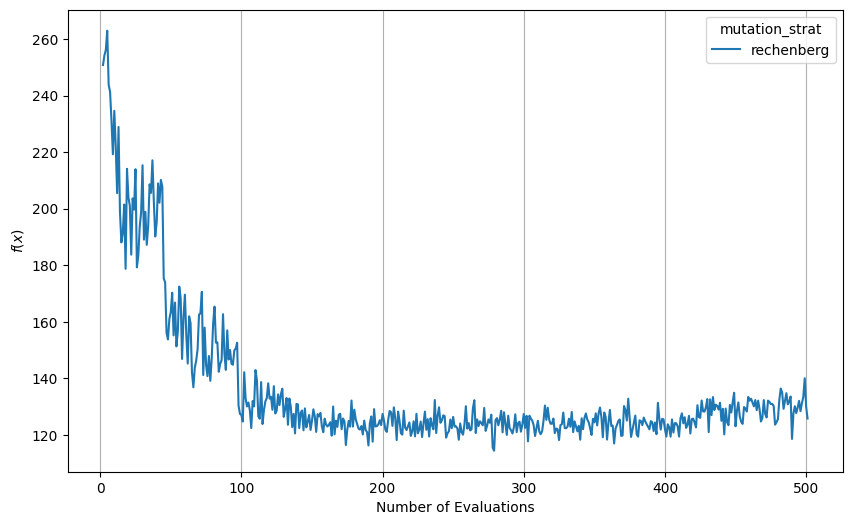

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))

res = evolution_log.groupby(["n_evals", "mutation_strat", "run_id"]).agg(
    {"avg_regret": "mean"}
).reset_index()

sns.lineplot(x="n_evals", y="avg_regret", data=res, hue="mutation_strat", ax=ax)

ax.set_ylabel("$f(x)$")
ax.grid(axis="x")
ax.set_xlabel("Number of Evaluations")

## Customer Init

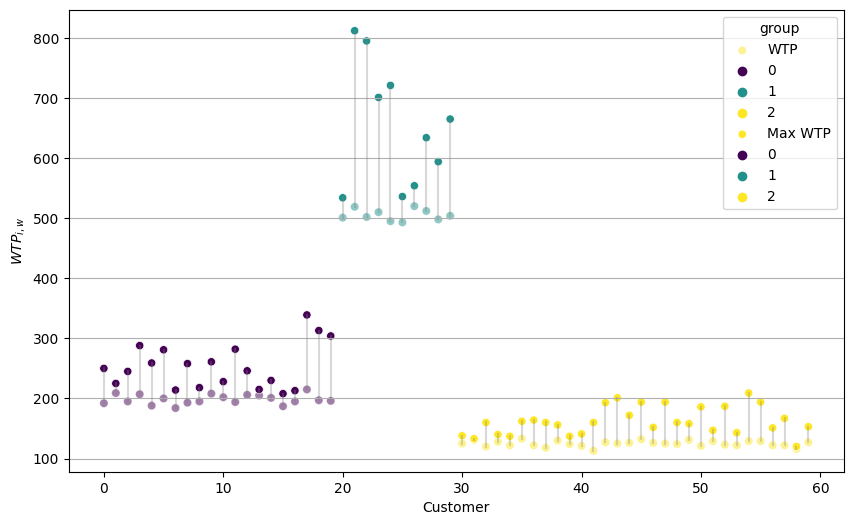

In [13]:
customers = event_history.drop_duplicates(subset=["customer"])

fig, ax = plt.subplots(figsize=(10, 6))

# First plot the scatter points
sns.scatterplot(
    x="customer",
    y="customer_wtp",
    data=customers,
    hue="group",
    label="WTP",
    palette="viridis",
    alpha=0.5,
)
sns.scatterplot(
    x="customer",
    y="customer_max_wtp",
    data=customers,
    hue="group",
    label="Max WTP",
    palette="viridis",
    alpha=1,
)

# Add lines connecting the points for each customer
for _, customer in customers.iterrows():
    ax.plot(
        [customer.customer, customer.customer],
        [customer.customer_wtp, customer.customer_max_wtp],
        color="gray",
        alpha=0.3,
        linestyle="-",
    )

ax.set_xlabel("Customer")
ax.grid(axis="y")
ax.set_ylabel(WTP)
plt.show()

## WTP changes

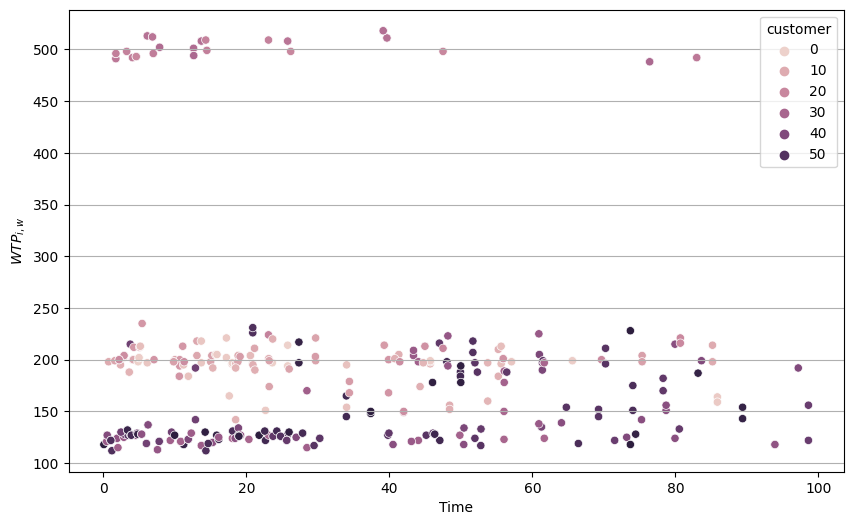

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x="t", y="erp", data=event_history, hue="customer")
ax.set_xlabel("Time")
ax.set_ylabel(WTP)
ax.grid(axis="y")
plt.show()

# Price Matrix

<Axes: xlabel='visit', ylabel='price'>

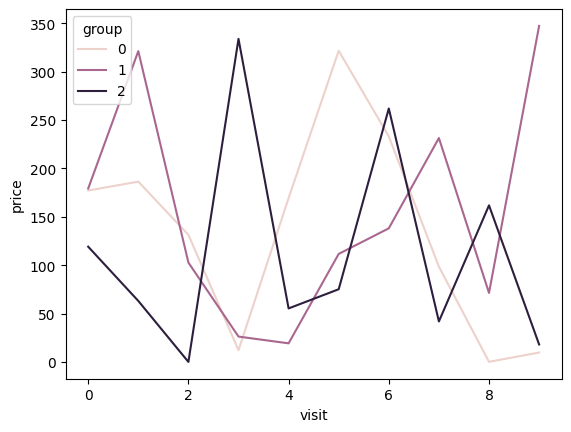

In [15]:
sns.lineplot(data=price_matrix, x='visit', hue='group', y='price')

<Axes: xlabel='visit', ylabel='group'>

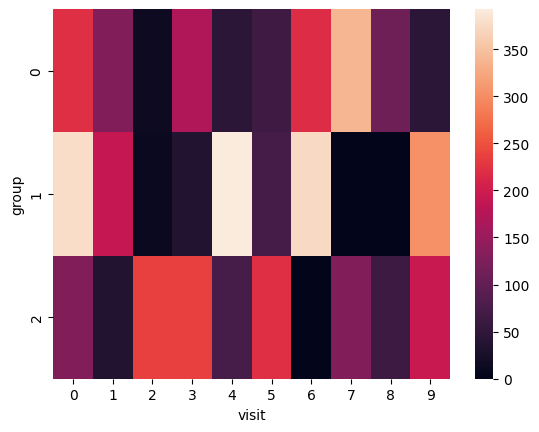

In [79]:
sns.heatmap(price_matrix.pivot(index="group", columns="visit", values="price"))

# Sensitivity Analysis

## Comma vs Plus

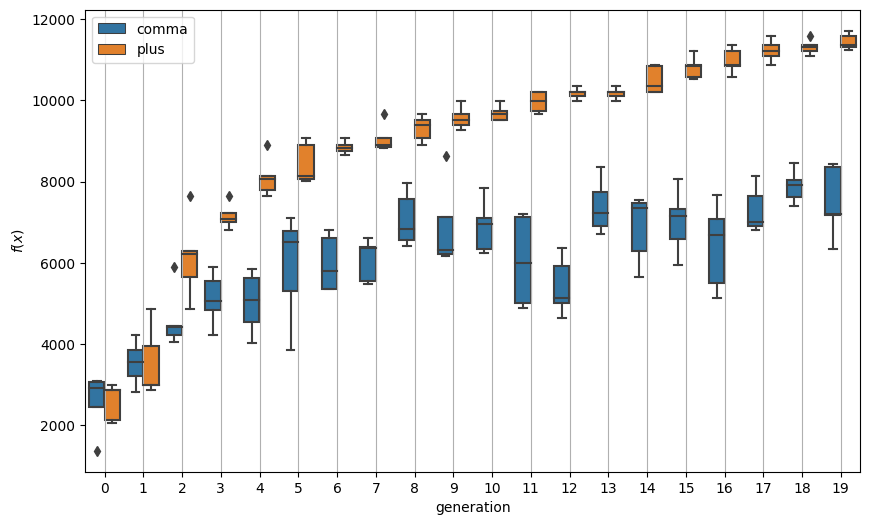

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(
    x="generation",
    y="score",
    data=evolution_log.loc[evolution_log["type"] == "population"],
    hue="selection",
    ax=ax,
)
ax.legend()
ax.set_ylabel("$f(x)$")
ax.grid(axis="x")
plt.show()

## Steady State ES

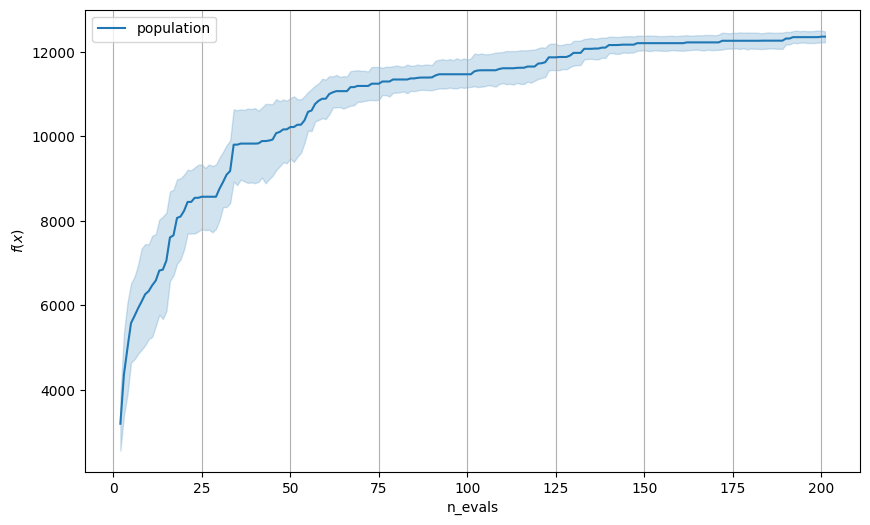

In [29]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(
    x="n_evals",
    y="score",
    data=evolution_log.loc[evolution_log["type"] == "population"],
    hue="type",
    ax=ax,
)
ax.legend()
ax.set_ylabel("$f(x)$")
ax.grid(axis="x")
plt.show()

<Axes: xlabel='n_evals', ylabel='mutation_strength'>

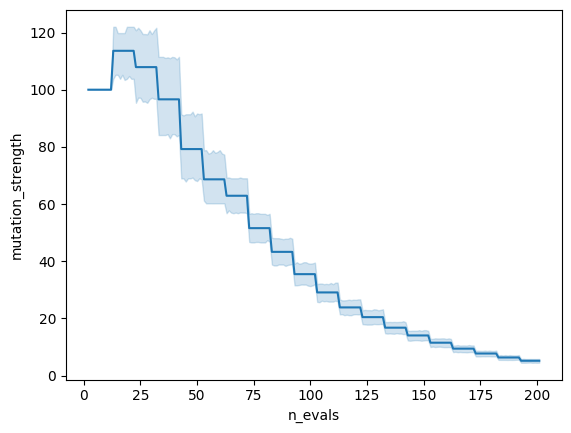

In [28]:
sns.lineplot(
    x="n_evals",
    y="mutation_strength",
    data=evolution_log.loc[evolution_log["type"] == "population"],
)

## Loss Aversion

In [22]:
run_summary = evolution_log.groupby(["run_id", "loss_aversion"]).agg(
    {"score": "max"}
).reset_index()

<Axes: xlabel='loss_aversion', ylabel='score'>

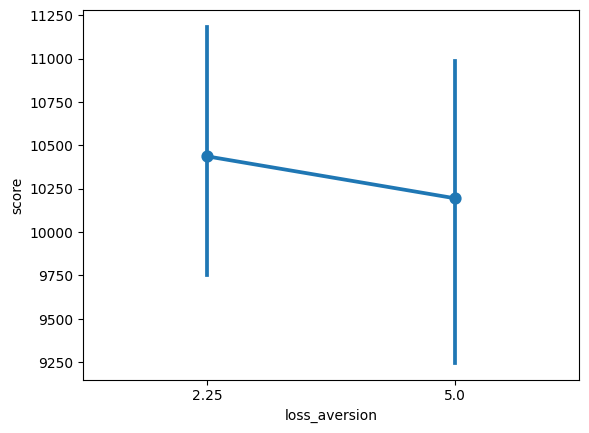

In [23]:
run_summary
sns.pointplot(
    x="loss_aversion",
    y="score",
    data=run_summary,
)

# MAB

In [31]:
mab_log = pd.read_csv("mab_log.csv")

In [32]:
mab_log.loc[mab_log["group"] == 0]

,t,group,visit,price,reward,last_action
0,0,0,0,277,277,random
2,0,0,0,55,55,random
4,1,0,0,277,0,best
8,3,0,0,333,0,random
12,4,0,0,277,0,best
14,4,0,0,277,0,best
16,5,0,0,277,0,best
20,7,0,0,277,0,best
22,9,0,0,277,0,best
26,10,0,0,277,0,best


In [11]:
event_history.loc[event_history["event"] == "sold"].groupby('loss_aversion').agg({'price': 'mean'})

,price
loss_aversion,
2.25,196.444444
5.00,167.929825
